## Enriquecimento com API do Google Maps

### Objetivo:
Nesta etapa, validamos o **enriquecimento de dados** realizado através da **Google Maps API**, que calcula a distância (em quilômetros) entre a residência do aluno e a faculdade.

---

### Verificações principais:
- Verificar se a coluna `distancia_residencia_faculdade` foi gerada corretamente.  
- Analisar a **distribuição das distâncias**.  
- Identificar **outliers** (distâncias muito altas ou nulas).  
- Calcular **médias por curso ou turno** para entender padrões de deslocamento.

---

> *Essa etapa é essencial, pois a distância pode ser um dos fatores que mais influenciam na evasão dos alunos.*


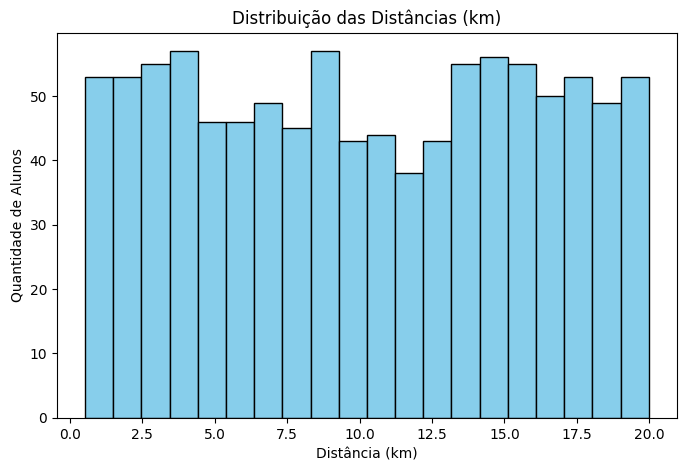

curso
Direito                    9.727171
Administracao             10.025748
Engenharia de Software    10.346216
Enfermagem                10.531231
Psicologia                10.672935
Name: distancia_residencia_faculdade, dtype: float64

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_parquet("../data/tmp/enriched.parquet")

# Remove linhas sem distância e garante tipo numérico
df = df.dropna(subset=["distancia_residencia_faculdade"])
df["distancia_residencia_faculdade"] = pd.to_numeric(
    df["distancia_residencia_faculdade"], errors="coerce"
)

# Distribuição das distâncias
plt.figure(figsize=(8,5))
plt.hist(df["distancia_residencia_faculdade"], bins=20, color="skyblue", edgecolor="black")
plt.title("Distribuição das Distâncias (km)")
plt.xlabel("Distância (km)")
plt.ylabel("Quantidade de Alunos")
plt.show()

# Verifica médias de distâncias por curso
df.groupby("curso")["distancia_residencia_faculdade"].mean().sort_values()
